In [6]:
!pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 11.3 MB/s eta 0:00:14
   - -------------------------------------- 3.9/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 5.5/150.0 MB 10.8 MB/s eta 0:00:14
   -- ------------------------------------- 8.4/150.0 MB 11.1 MB/s eta 0:00:13
   -- ------------------------------------- 10.5/150.0 MB 11.1 MB/s eta 0:00:13
   --- ------------------------------------ 12.8/150.0 MB 10.9 MB/s eta 0:00:13
   --- ------------------------------------ 13.6/150.0 MB 10.0 MB/s eta 0:00:14
   --- ------------------------------------ 13.9/150.0 MB 8.8 MB/s eta 0:00:16
   --- ------------------------------------ 14.4/150.0 MB 8.5 MB/s eta 0:00:16
   --- ------------------------------------ 14.4/150.0 MB 8.5 MB/s eta 0:00:16
   --- ------------------------------------ 14.9/150.0 MB 6.7 MB/s

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 12.0 MB/s eta 0:00:13
    --------------------------------------- 3.4/150.0 MB 9.6 MB/s eta 0:00:16
   - -------------------------------------- 5.8/150.0 MB 10.4 MB/s eta 0:00:14
   -- ------------------------------------- 7.6/150.0 MB 10.2 MB/s eta 0:00:14
   -- ------------------------------------- 9.2/150.0 MB 9.5 MB/s eta 0:00:15
   -- ------------------------------------- 10.2/150.0 MB 8.7 MB/s eta 0:00:16
   --- ------------------------------------ 11.5/150.0 MB 8.2 MB/s eta 0:00:17
   --- ------------------------------------ 12.6/150.0 MB 8.2 MB/s eta 0:00:17
   --- ------------------------------------ 12.6/150.0 MB 8.2 MB/s eta 0:00:17
   --- ------------------------------------ 12.6/150.0 MB 8.2 MB/s eta 0:00:17
   --- ------------------------------------ 12.8/150.0 MB 5.9 MB/s eta 0:00:24
   --- ------------------------------------ 13.6/150.0 MB 5.5 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import xgboost as xgb

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv("C:/Users/raiha/CODE/PJME_hourly.csv")

In [16]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [17]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [18]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<Axes: xlabel='Datetime'>

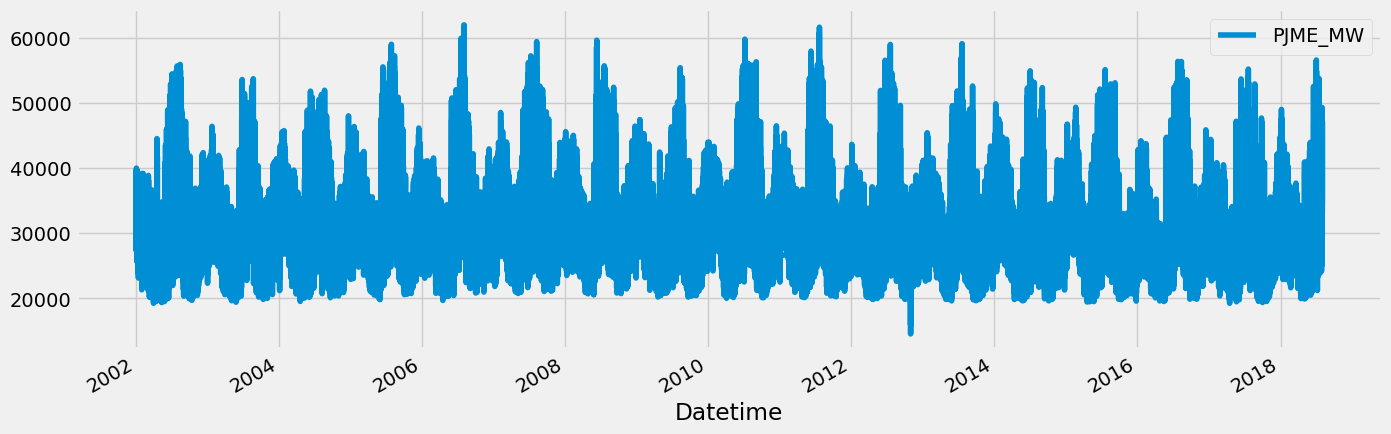

In [21]:
df.plot(figsize=(15, 5))

#Train / Test Split

In [24]:
train_size = int(len(df)*0.8)

In [25]:
train , test =df[:train_size],df[train_size:]

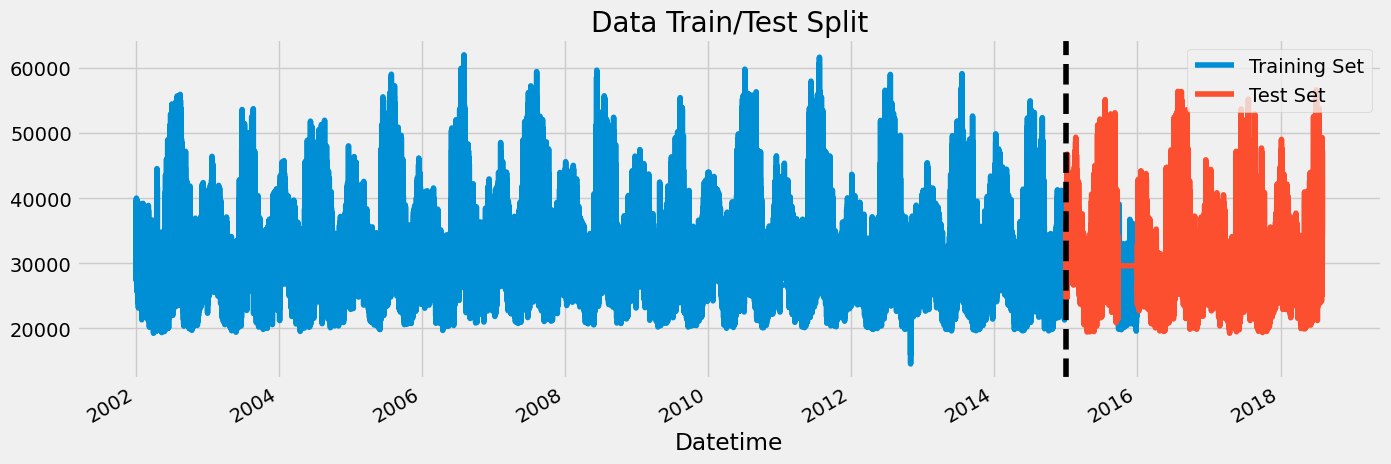

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [29]:
from xgboost import XGBRegressor

In [32]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [33]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [34]:
from matplotlib.pyplot import grid
import param
from sklearn.model_selection import GridSearchCV
param_grid = {

    'learning_rate': [0.01, 0.1, 0.2],

    'max_depth': [3, 5, 7],

    'subsample': [0.8, 0.9, 1.0]

}
gridsearch = GridSearchCV(XGBRegressor(),param_grid ,cv = 3)
gridsearch.fit(X_train,y_train)
best_params = gridsearch.best_params_

In [35]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}

In [43]:
reg= XGBRegressor(**best_params)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6172.12820	validation_1-rmse:6306.54323
[99]	validation_0-rmse:3038.96834	validation_1-rmse:3872.88259


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

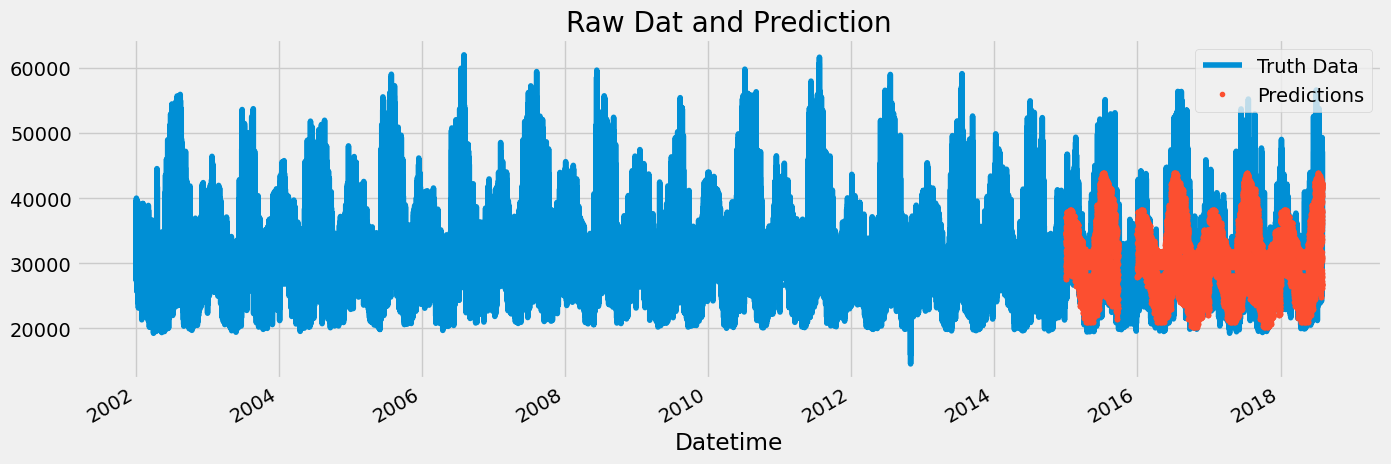

In [42]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()